In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = "car_evaluation.csv"
data = pd.read_csv(file_path, header=None, names=["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"])

In [4]:
data_encoded = pd.get_dummies(data, columns=["buying", "maint", "doors", "persons", "lug_boot", "safety"], drop_first=True)

In [5]:
X = data_encoded.drop("class", axis=1)
y = data["class"].astype("category").cat.codes

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

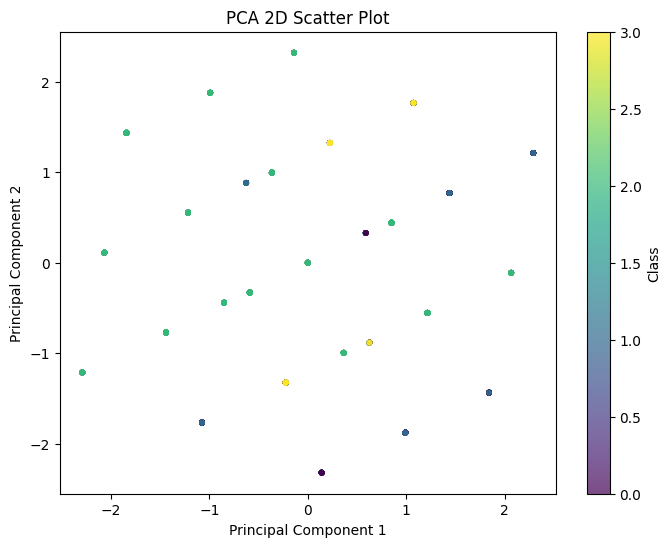

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=10, alpha=0.7)
plt.colorbar(label="Class")
plt.title("PCA 2D Scatter Plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

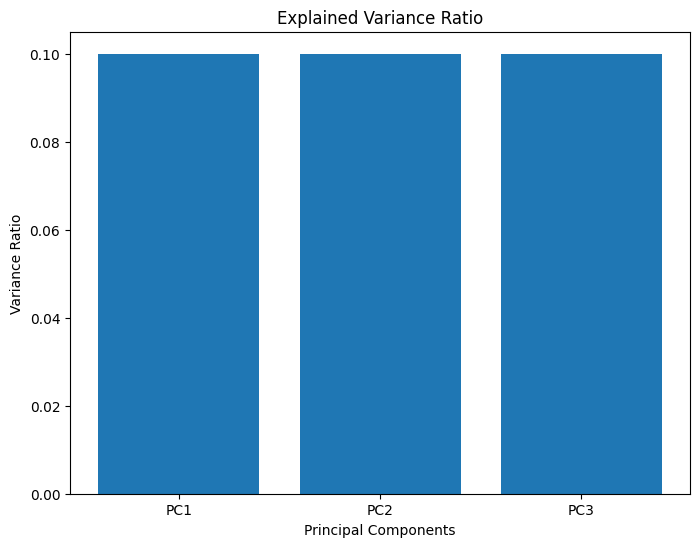

In [9]:
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, tick_label=[f"PC{i}" for i in range(1, len(explained_variance_ratio) + 1)])
plt.title("Explained Variance Ratio")
plt.xlabel("Principal Components")
plt.ylabel("Variance Ratio")
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_pca_train, X_pca_test = train_test_split(X_pca, test_size=0.2, random_state=42)

In [11]:
rf_original = RandomForestClassifier(random_state=42)
rf_original.fit(X_train, y_train)
y_pred_original = rf_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

In [12]:
rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_pca_train, y_train)
y_pred_pca = rf_pca.predict(X_pca_test)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

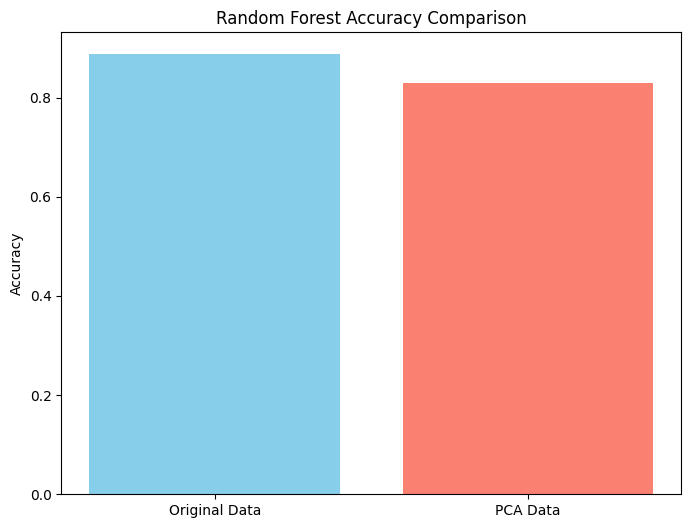

In [13]:
plt.figure(figsize=(8, 6))
plt.bar(["Original Data", "PCA Data"], [accuracy_original, accuracy_pca], color=["skyblue", "salmon"])
plt.title("Random Forest Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

In [14]:
print("Random Forest Accuracy with Original Data:", accuracy_original)
print("Random Forest Accuracy with PCA Data:", accuracy_pca)

Random Forest Accuracy with Original Data: 0.8872832369942196
Random Forest Accuracy with PCA Data: 0.8294797687861272
